<h1> Content Based Movie Recommender System </h1>


<h3>Project Planning :</h3> 

  - **Exploring Data -**
    - Understand the nature of the data *.info()*
    - Getting unique users, titles, and genres.
    - Obtaining insights on the Number of Ratings, Average Rating, and their relation via various graphs
    
  - **Building a System -**
    - Creating a pivot table
    - Making suggestions using a single title. 

  - **Recommendation System -**
    - Creating a function '*similar_to*' for fetching likable titles to user-specified movies. 
    - Keyword search privilege for a user to select a specific movie title from the dataset.
    - Suggesting movies along with match percentage and number of ratings similar to the user-selected title. 

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import sys

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
sns.set_context('notebook')
matplotlib.rcParams['figure.figsize'] = (15,8) 

# Data Exploration

In [3]:
# Only movies.csv and rating.csv datasets are used


# df_link = pd.read_csv('../input/movie-lens-latest-small-dataset-100k/ml-latest-small/links.csv')
# df_tag = pd.read_csv('../input/movie-lens-latest-small-dataset-100k/ml-latest-small/tags.csv')
df_movie = pd.read_csv('../input/movie-lens-latest-small-dataset-100k/ml-latest-small/movies.csv')
df_rating = pd.read_csv('../input/movie-lens-latest-small-dataset-100k/ml-latest-small/ratings.csv')

In [4]:
# Movie data

display(df_movie.info())
print('\n\n')
df_movie.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


None

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
# Ratings Data

display(df_rating.info())
print('\n\n')
df_rating.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


None

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
# Combining both datasets in to one.
# We have total of 100836 records in our dataset

df = pd.merge(df_rating, df_movie, on='movieId')

display(df.info())
print('\n\n')
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


None

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [7]:
print('Total number of users are {}'.format(df['userId'].nunique()))

Total number of users are 610


In [8]:
print('Total number of movies are {}'.format(df['title'].nunique()))

Total number of movies are 9719


In [9]:
print('Total number of unique genres are {}\n'.format(df['genres'].nunique()))
print('Top genres are \n\n',df['genres'].value_counts().head())

Total number of unique genres are 951

Top genres are 

 Comedy                  7196
Drama                   6291
Comedy|Romance          3967
Comedy|Drama|Romance    3000
Comedy|Drama            2851
Name: genres, dtype: int64


In [10]:
# Titles with most and least ratings.

rat_avg = df.groupby('title').mean()['rating'].sort_values(ascending=False)
rat_avg

title
Gena the Crocodile (1969)                  5.0
True Stories (1986)                        5.0
Cosmic Scrat-tastrophe (2015)              5.0
Love and Pigeons (1985)                    5.0
Red Sorghum (Hong gao liang) (1987)        5.0
                                          ... 
Don't Look Now (1973)                      0.5
Journey 2: The Mysterious Island (2012)    0.5
Joe Dirt 2: Beautiful Loser (2015)         0.5
Jesus Christ Vampire Hunter (2001)         0.5
Fullmetal Alchemist 2018 (2017)            0.5
Name: rating, Length: 9719, dtype: float64

In [11]:
# Titles with most and least number of ratings.

rat_count = df.groupby('title').count()['rating']
rat_count.sort_values(ascending=False)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
                                            ... 
King Solomon's Mines (1950)                    1
King Solomon's Mines (1937)                    1
King Ralph (1991)                              1
King Kong Lives (1986)                         1
À nous la liberté (Freedom for Us) (1931)      1
Name: rating, Length: 9719, dtype: int64

In [12]:
# Creating a DataFrame using above findings, i.e Average ratings and number of users rated for the movie.

df_rate = pd.DataFrame(rat_avg)
df_rate['no_of_ratings'] = pd.DataFrame(rat_count)
df_rate

,rating,no_of_ratings
title,,
Gena the Crocodile (1969),5.0,1
True Stories (1986),5.0,1
Cosmic Scrat-tastrophe (2015),5.0,1
Love and Pigeons (1985),5.0,1
Red Sorghum (Hong gao liang) (1987),5.0,1
...,...,...
Don't Look Now (1973),0.5,1
Journey 2: The Mysterious Island (2012),0.5,1
Joe Dirt 2: Beautiful Loser (2015),0.5,1


## Number of Ratings

title
Forrest Gump (1994)                  329
Shawshank Redemption, The (1994)     317
Pulp Fiction (1994)                  307
Silence of the Lambs, The (1991)     279
Matrix, The (1999)                   278
                                    ... 
Suspect Zero (2004)                    1
Signal, The (2007)                     1
Silent Night, Deadly Night (1984)      1
Silent Movie (1976)                    1
Fullmetal Alchemist 2018 (2017)        1
Name: no_of_ratings, Length: 9719, dtype: int64




<AxesSubplot:>

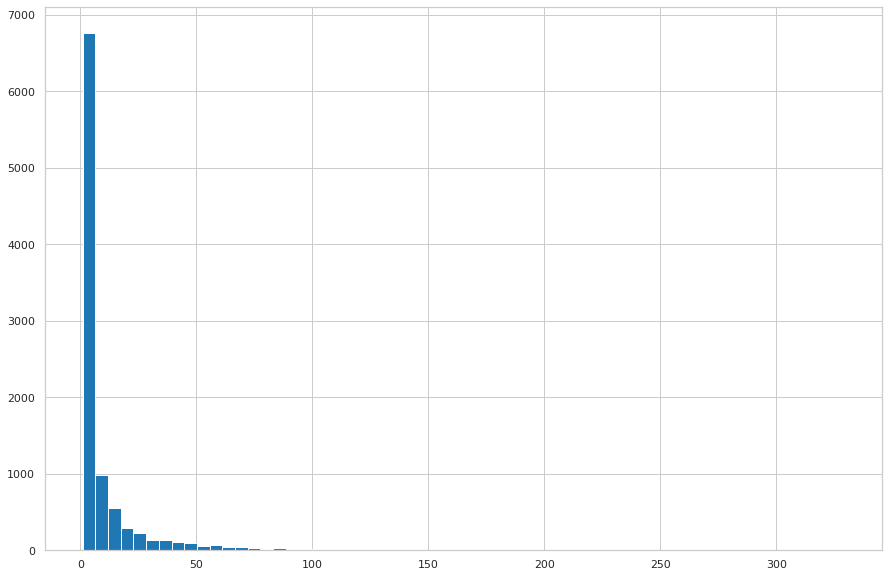

In [13]:
# Plotting number of ratings(x) vs count of titles with that exact number of ratings(y)

print(df_rate['no_of_ratings'].sort_values(ascending=False))
print('\n')

plt.figure(figsize=(15,10))
df_rate['no_of_ratings'].sort_values(ascending=False).hist(bins=60)

# Here all records are considered (9719) and 
# due to lot of titles with less number of ratings(ex:1) graph is not clear

Hence plotting two graphs
-  Titles with 10+ ratings and more
-  Titles with less than 10 ratings

title
Forrest Gump (1994)                                329
Shawshank Redemption, The (1994)                   317
Pulp Fiction (1994)                                307
Silence of the Lambs, The (1991)                   279
Matrix, The (1999)                                 278
                                                  ... 
Medicine Man (1992)                                 11
Wild Bunch, The (1969)                              11
Cook the Thief His Wife & Her Lover, The (1989)     11
Jean de Florette (1986)                             11
Kick-Ass 2 (2013)                                   11
Name: no_of_ratings, Length: 2100, dtype: int64




<AxesSubplot:>

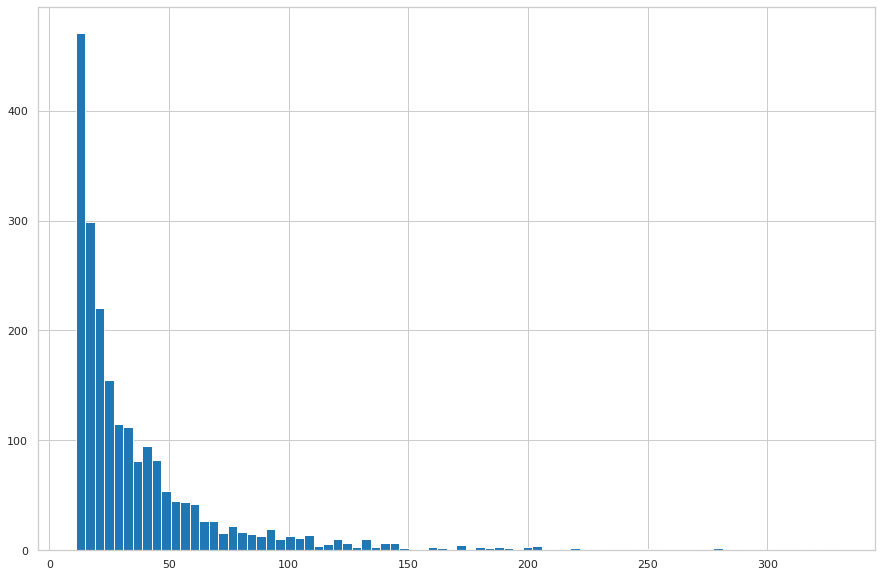

In [14]:
# Titles with 10+ ratings and more
# Number of ratings for a title is sorted in descending order
# Top 2121 rows contains records with 10+ ratings upto 329 ratings

print(df_rate['no_of_ratings'].sort_values(ascending=False)[:2100])
print('\n')

plt.figure(figsize=(15,10))
df_rate['no_of_ratings'].sort_values(ascending=False)[:2121].hist(bins=80)

title
Spice World (1997)                     10
Futurama: Bender's Big Score (2007)    10
One Fine Day (1996)                    10
Semi-Pro (2008)                        10
Hate (Haine, La) (1995)                10
                                       ..
Suspect Zero (2004)                     1
Signal, The (2007)                      1
Silent Night, Deadly Night (1984)       1
Silent Movie (1976)                     1
Fullmetal Alchemist 2018 (2017)         1
Name: no_of_ratings, Length: 7598, dtype: int64




<AxesSubplot:>

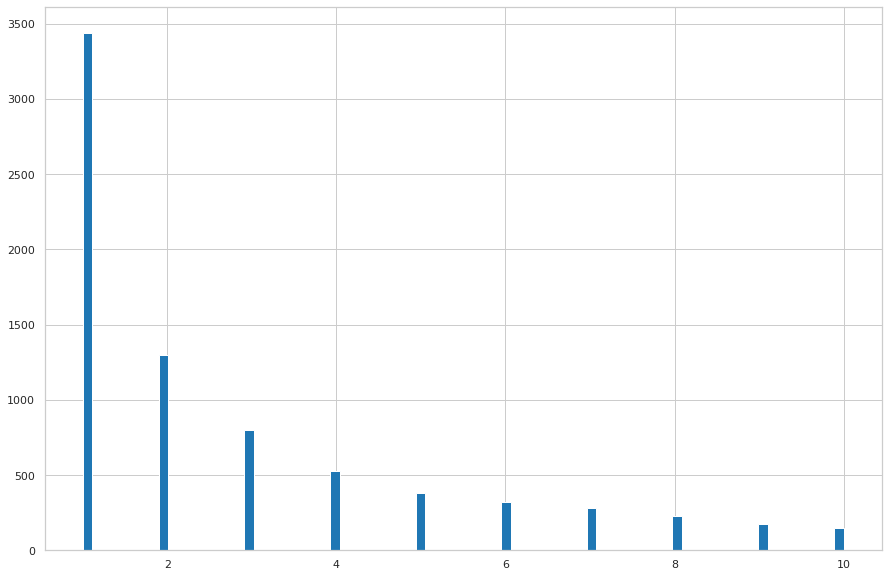

In [15]:
# Titles with less than or equal to 10 ratings
# Number of ratings for a title is sorted in descending order
# Exculding Top 2121 rows from 9719 total sorted titles; 
# 7598 records with less than or equal to 10 no. of ratings.

print(df_rate['no_of_ratings'].sort_values(ascending=False)[2121:])
print('\n')

plt.figure(figsize=(15,10))
df_rate['no_of_ratings'].sort_values(ascending=False)[2121:].hist(bins=80)

## Average Rating

<AxesSubplot:>

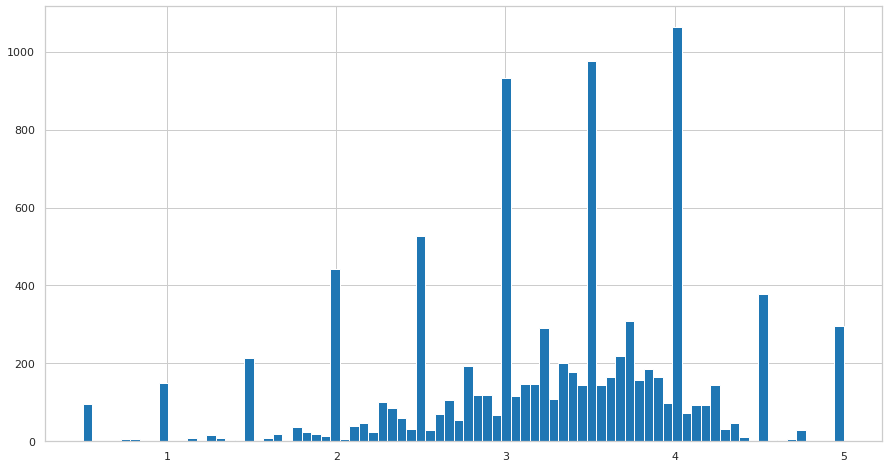

In [16]:
# Average rating of titles (x) vs count(y)

df_rate['rating'].hist(bins=80)

## Number of Ratings vs Average Ratings

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


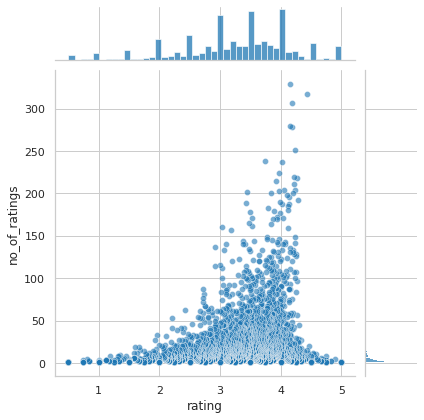

In [17]:
# Relation between average ratings(x) vs no. of ratings(y)

sns.jointplot(df_rate['rating'], df_rate['no_of_ratings'],alpha=0.6, kind='scatter')

# Movies with less number of ratings tends to have lower ratings. 
# Similarly more the number of ratings, better the ratings are.

# Building a System 

In [18]:
# Creating a pivot table with 'user_Id' as index and 'titles' as columns
# Each row contains a unique user and movies the user rated

matrix = df.pivot_table(values='rating', index='userId',columns='title')
matrix

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


<h3> Suggesting for a Single Movie </h3>

In [19]:
# Taking 'Shawshank Redemption, The (1994)' as an example
# Extracting ratings of the movie by all users

shawshank_ratings = matrix['Shawshank Redemption, The (1994)']
shawshank_ratings

userId
1      NaN
2      3.0
3      NaN
4      NaN
5      3.0
      ... 
606    3.5
607    5.0
608    4.5
609    4.0
610    3.0
Name: Shawshank Redemption, The (1994), Length: 610, dtype: float64

In [20]:
# Using correlation between selected movie and all movies based on user ratings; 
# Getting similar movies with selected movie

shawshank_alike = matrix.corrwith(shawshank_ratings)
print(shawshank_alike.dropna().sort_values(ascending=False))

/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
Principal, The (1987)                                 1.0
Chi-Raq (2015)                                        1.0
Rififi (Du rififi chez les hommes) (1955)             1.0
Robot & Frank (2012)                                  1.0
Rock Star (2001)                                      1.0
                                                     ... 
Police Story 2 (Ging chaat goo si juk jaap) (1988)   -1.0
Police Story (Ging chaat goo si) (1985)              -1.0
School Daze (1988)                                   -1.0
Dead or Alive: Hanzaisha (1999)                      -1.0
Respiro (2002)                                       -1.0
Length: 4785, dtype: float64


In [21]:
# Many of the movies have less number of ratings,
# Excluding suggestions with a threshold number of ratings.

# Creating DF for above cell and adding no. of ratings column
shawshank_corr = pd.DataFrame(shawshank_alike,columns=['corr']).dropna()
shawshank_corr = shawshank_corr.join(df_rate['no_of_ratings'])
shawshank_corr

,corr,no_of_ratings
title,,
"'burbs, The (1989)",0.419543,17
(500) Days of Summer (2009),0.249580,42
*batteries not included (1987),0.404520,7
...And Justice for All (1979),-1.000000,3
10 Cloverfield Lane (2016),0.145671,14
...,...,...
[REC]² (2009),0.944911,3
eXistenZ (1999),0.047590,22
xXx (2002),0.301531,24


In [22]:
# Threshold is set as 100 (tunable accordingly)
# So similar movies should have atleast 100 no. of ratings
# Excluding first row as the movie Shawshank Redemption is perfectly correlated with itself.

print(shawshank_corr[shawshank_corr['no_of_ratings']>100].sort_values(by='corr',ascending=False)[1:].head(25))

                                                        corr  no_of_ratings
title                                                                      
Four Weddings and a Funeral (1994)                  0.446212            103
Schindler's List (1993)                             0.402202            220
Usual Suspects, The (1995)                          0.394294            204
Ocean's Eleven (2001)                               0.391546            119
Green Mile, The (1999)                              0.382818            111
Inception (2010)                                    0.377839            143
Catch Me If You Can (2002)                          0.356612            115
One Flew Over the Cuckoo's Nest (1975)              0.354215            133
Godfather: Part II, The (1974)                      0.349872            129
Departed, The (2006)                                0.347259            107
Firm, The (1993)                                    0.343882            101
Fight Club (

# **Recommendation System**

## Function to Fetch Similar Movies

**Function Description**

Line:
1. Takes input as movie name.
2. Stores correlation of selected movie and all movies in *p* 
3. Temporary DF is created with *p* and excluding null values
4. Temporary DF has two columns *corr* and *no_of_ratings*
5. Select a threshold for minimum no. of ratings(*Thresh_rat*) for a suggested movie [Higher for Famous movies]
6. Select a threshold for % match(*Thresh_corr*)
7. Selecting similar movies based on *Thresh_rat*
8. Display all movies above *'Thresh_corr'* % Match; if suggestions are less than threshold level display five movies.
9. Change the display format of *Corr* column
10. Change the display format of *no_of_ratings* column
11. Return Similar Movies

In [23]:
def similar_to(movie_name):
  p = matrix.corrwith(matrix[movie_name]) 
  temp_df = pd.DataFrame(p,columns=['corr']).dropna()
  temp_df =temp_df.join(df_rate['no_of_ratings'])
  Thresh_rat = 80 # Adjusting this may give different results
  Thresh_corr = 0.50 # Percentage of match to show
  q = temp_df[temp_df['no_of_ratings']>Thresh_rat].sort_values(by='corr',ascending=False)[1:]
  q = q.head(5) if len(q[q['corr']>Thresh_corr])<5 else q[q['corr']>Thresh_corr]
  q['corr'] = q['corr'].apply(lambda x: "{}{}".format(round(x*100,1), '% Match'))
  q['no_of_ratings'] = q['no_of_ratings'].apply(lambda x: "{}{}".format(x, ' Ratings'))
  print('Users who watched "{}" also watched these\n'.format(movie_name))
  return q

# Exclude all Warnings
import warnings
warnings.filterwarnings("ignore")

## Selecting a Movie from Dataset

1. In *search* enter any key words/movie name as string and run the cell.
2. From the list displayed select a movie .
2. Copy a desired movie name

In [24]:
def search(x):
  print("\n".join(s for s in df['title'].unique() if x.lower() in s.lower()))
  pass

# Enter keyword here as search('__') and run the cell
search('figh') 

Fight Club (1999)
X-Files: Fight the Future, The (1998)
Fighter, The (2010)
Last Starfighter, The (1984)
Fighting Seabees, The (1944)
Fighting Temptations, The (2003)
Fist Fight (2017)
Craig Ferguson: Tickle Fight (2017)
Street Fighter (1994)
Girlfight (2000)
While You Were Fighting: A Thor Mockumentary (2016)
Why We Fight (2005)
Dogfight (1991)
Bring It On: Fight to the Finish (2009)
Street Fighter II: The Animated Movie (Sutorîto Faitâ II gekijô-ban) (1994)
Karate Bullfighter (1975)


## Suggested Movies


Paste the selected/copied movie from above in 
`similar_to('____')` and run.


In [25]:
similar_to ('X-Men (2000)')

Users who watched "X-Men (2000)" also watched these



,corr,no_of_ratings
title,,
Iron Man (2008),58.4% Match,94 Ratings
While You Were Sleeping (1995),57.5% Match,98 Ratings
Star Trek: Generations (1994),57.2% Match,108 Ratings
Batman Begins (2005),47.6% Match,116 Ratings
Star Trek: First Contact (1996),47.5% Match,91 Ratings


In [26]:
similar_to('Jumanji: Welcome to the Jungle (2017)')

Users who watched "Jumanji: Welcome to the Jungle (2017)" also watched these



,corr,no_of_ratings
title,,
Ace Ventura: Pet Detective (1994),100.0% Match,161 Ratings
Heat (1995),100.0% Match,102 Ratings
"Mummy, The (1999)",100.0% Match,87 Ratings
Men in Black (a.k.a. MIB) (1997),100.0% Match,165 Ratings
Jumanji (1995),100.0% Match,110 Ratings
Shrek (2001),95.8% Match,170 Ratings
Toy Story 2 (1999),69.3% Match,97 Ratings
X-Men (2000),55.2% Match,133 Ratings


In [27]:
similar_to ('Fight Club (1999)')

Users who watched "Fight Club (1999)" also watched these



,corr,no_of_ratings
title,,
Life Is Beautiful (La Vita è bella) (1997),63.0% Match,88 Ratings
Outbreak (1995),62.8% Match,101 Ratings
Pulp Fiction (1994),54.3% Match,307 Ratings
Heat (1995),52.4% Match,102 Ratings
Four Weddings and a Funeral (1994),52.4% Match,103 Ratings
"Firm, The (1993)",51.6% Match,101 Ratings
Seven (a.k.a. Se7en) (1995),51.1% Match,203 Ratings
